# New York Rankings EDA
#### Lauryne Assa

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df2019=pd.read_csv('rank2019.csv')
df2020=pd.read_csv('rank2020.csv')
df2021=pd.read_csv('rank2021.csv')
pd.set_option('max_columns', 30)

## Looking at how the values within each year correlate with each other

In [3]:
df2020

,fips,state,county_name,health_outcomes_r,health_factors_r,length_life_r,quality_life_r,yppl,%poor_fair_health,%adult_obesity,food_environment_index,graduation_cohort,graduation_rate,%some_college,life_expectancy,%diabetes,%food_insecure,%limited_access,household_income,%lunch_aid,%african_american,%american_indian,%asian,%pacific_islander,%hispanic,%white
0,36001,New York,Albany,25,10,15,44,5821.072418,14.208671,27.3,8.0,3014,84.406105,76.783305,80.033193,9.1,12.0,4.779735,64536,35.501123,12.793821,0.296630,6.783734,0.067401,6.100932,71.807487
1,36003,New York,Allegany,47,52,49,34,7283.136814,14.416292,35.9,8.1,502,87.848606,61.366776,77.999828,10.9,12.4,2.991699,46262,51.937743,1.277191,0.316606,1.294422,0.040922,1.677795,94.294637
2,36005,New York,Bronx,62,62,36,62,6695.768724,26.798947,29.0,7.7,14750,67.511864,51.169291,80.559175,12.5,16.0,0.000920,38566,86.602547,29.222586,2.913558,4.500074,0.414766,56.365475,9.130723
3,36007,New York,Broome,52,37,51,49,7415.065526,15.929985,28.0,8.0,2205,82.947846,67.255530,78.673505,10.6,12.8,3.240672,50928,54.397057,5.469610,0.268185,4.427134,0.066785,4.341565,82.996885
4,36009,New York,Cattaraugus,57,59,47,60,7254.951597,16.370700,37.6,8.1,1041,85.014409,56.038590,77.848799,13.3,12.5,2.583937,48017,50.843238,1.378188,3.547631,0.871942,0.037741,2.123894,90.393024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,36115,New York,Washington,41,38,42,37,6949.619936,14.258736,33.6,8.4,690,79.565217,55.048419,78.567357,12.4,10.5,4.286443,55913,46.449938,2.939687,0.328447,0.558851,0.034315,2.849813,92.297008
58,36117,New York,Wayne,40,33,45,26,7146.866044,15.446684,36.3,8.6,1164,87.199313,64.357821,78.694902,12.1,9.8,3.488927,61118,46.736886,2.802452,0.416371,0.696172,0.041082,4.473486,89.829455
59,36119,New York,Westchester,5,3,2,23,4257.651377,14.801189,20.7,9.1,11163,89.554779,71.893480,83.505387,7.6,7.7,1.379185,94521,36.182755,13.804293,0.956478,6.435534,0.132284,25.140346,53.088118
60,36121,New York,Wyoming,18,28,25,9,6456.009504,13.954072,37.9,8.2,339,93.805310,55.188175,78.742584,12.3,10.5,6.066659,57709,43.360071,5.119122,0.444056,0.563802,0.029936,3.260571,89.901459


### CORRELATIONS

In [4]:
table=df2021.corr()
table=table[['%food_insecure','%limited_access','%lunch_aid','food_environment_index']]
table.style.background_gradient(cmap="coolwarm").set_precision(2)

,%food_insecure,%limited_access,%lunch_aid,food_environment_index
fips,-0.43,-0.01,-0.25,0.36
health_outcomes_r,0.66,0.14,0.37,-0.62
health_factors_r,0.77,0.15,0.54,-0.71
length_life_r,0.53,0.14,0.25,-0.51
quality_life_r,0.67,0.06,0.51,-0.58
yppl,0.52,0.26,0.21,-0.57
%poor_fair_health,0.79,-0.03,0.75,-0.63
%adult_obesity,0.40,0.32,0.08,-0.49
food_environment_index,-0.87,-0.56,-0.47,1.00
%some_college,-0.43,-0.19,-0.31,0.44


### KEY TAKEAWAYS 

STRONG POSITIVE LINEAR RELATIONSHIPS (>0.5)
- %food insecure & %poor_fair_health
- %food insecure & %lunch aid

- %lunch aid & %poor_fair_health


STRONG NEGATIVE LINEAR RELATIONSHIPS (<-0.5)
- %food insecure & graduation rate
- %food insecure & household_income

- %lunch aid & %graduation_rate
- %lunch aid & household_income

<AxesSubplot:xlabel='%food_insecure', ylabel='%poor_fair_health'>

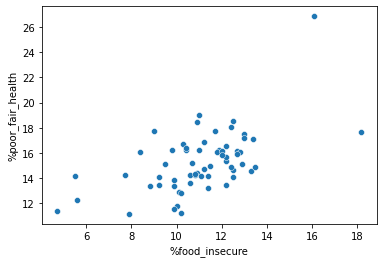

In [5]:
sns.scatterplot(x='%food_insecure',y='%poor_fair_health',data=df2019)

<AxesSubplot:xlabel='%food_insecure', ylabel='graduation_rate'>

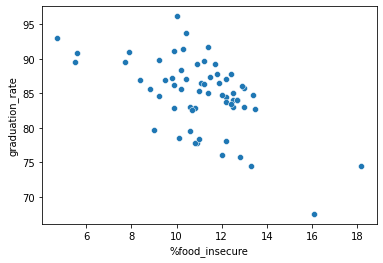

In [6]:
sns.scatterplot(x='%food_insecure',y='graduation_rate',data=df2019)

### **the strong linear relationships in regard to food insecurity are constant throughout all 3 years

## Looking at the differences between the years

In [7]:
#FEATURE ENGINEERING
df2019['year']="2019"
df2020['year']="2020"
df2021['year']="2021"
dfyears=pd.concat([df2019,df2020,df2021]).reset_index()
dfyears.drop(columns='index')

,fips,state,county_name,health_outcomes_r,health_factors_r,length_life_r,quality_life_r,yppl,%poor_fair_health,%adult_obesity,food_environment_index,graduation_cohort,graduation_rate,%some_college,life_expectancy,%diabetes,%food_insecure,%limited_access,household_income,%lunch_aid,%african_american,%american_indian,%asian,%pacific_islander,%hispanic,%white,year
0,36087,New York,Rockland,1,6,3,3,4272.900333,14.089078,23.7,8.8,3248.0,84.544335,63.805615,83.312875,8.8,9.2,3.337587,87873,37.106402,11.477857,0.525135,6.495311,0.135921,17.967391,62.692022,2019
1,36059,New York,Nassau,2,1,5,13,4300.055841,12.252958,23.2,9.7,16554.0,90.769603,74.845911,82.827126,8.5,5.6,0.468288,107465,28.178347,11.560597,0.532890,10.133595,0.095362,17.150610,59.851451,2019
2,36119,New York,Westchester,3,4,2,19,4144.305550,14.281145,20.7,9.2,11163.0,89.554779,71.819318,83.525185,7.9,7.7,1.379185,90483,36.438612,13.732703,0.950172,6.528477,0.126805,24.863197,53.383545,2019
3,36091,New York,Saratoga,4,2,6,4,4906.755021,11.160446,26.4,8.9,2742.0,90.919037,77.947014,80.920521,9.3,7.9,3.984430,82732,22.913952,1.694443,0.232306,2.949941,0.050899,3.230971,90.299692,2019
4,36061,New York,New York,5,12,1,30,3984.712120,14.532237,15.8,8.3,16235.0,74.536495,83.735332,84.516308,7.0,13.3,0.000000,84133,64.594362,12.372359,1.183858,12.983210,0.182432,26.130531,46.677563,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,36115,New York,Washington,39,42,32,50,6536.955196,18.201145,35.0,8.4,691.0,79.880608,55.108798,78.730189,13.5,10.5,4.286443,56897,42.573580,3.042285,0.341481,0.578394,0.040847,2.942618,92.023397,2021
182,36117,New York,Wayne,41,36,41,36,6852.573671,16.351121,37.3,8.5,1162.0,87.768933,64.163703,79.026823,13.2,10.1,3.488927,61989,46.747405,2.863720,0.431504,0.716208,0.047821,4.693165,89.509331,2021
183,36119,New York,Westchester,4,5,3,9,4221.004414,13.715787,21.6,9.2,11145.0,89.874338,72.457824,83.645393,7.9,7.8,1.379185,101741,33.250527,13.819656,0.968676,6.464043,0.140878,25.547128,52.619725,2021
184,36121,New York,Wyoming,26,34,18,31,6046.119841,17.616628,37.9,8.3,340.0,92.500000,56.359324,79.182632,11.9,10.1,6.066659,58214,42.035398,5.072882,0.461627,0.524348,0.035124,3.314182,89.851727,2021


In [8]:
dfyears.to_csv('rankyears.csv',index=False)

### Food Insecurity (% of the population who did not have access to a reliable source of food during the past year)

#### Aggregate of New York State

Text(0.5, 1.0, 'Aggregate of New York State (%food insecure)')

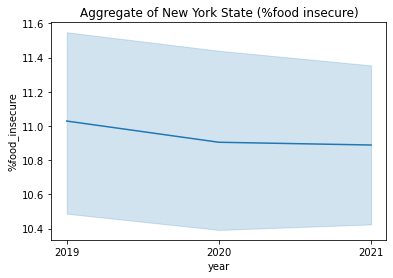

In [9]:
ax=sns.lineplot(data=dfyears,x='year',y='%food_insecure')
ax.set_title('Aggregate of New York State (%food insecure)')

The aggregate of NY State does not show much change in %food insecure, however NY State has 62 counties and looking at them individually might tell a different story.

#### New York State by counties

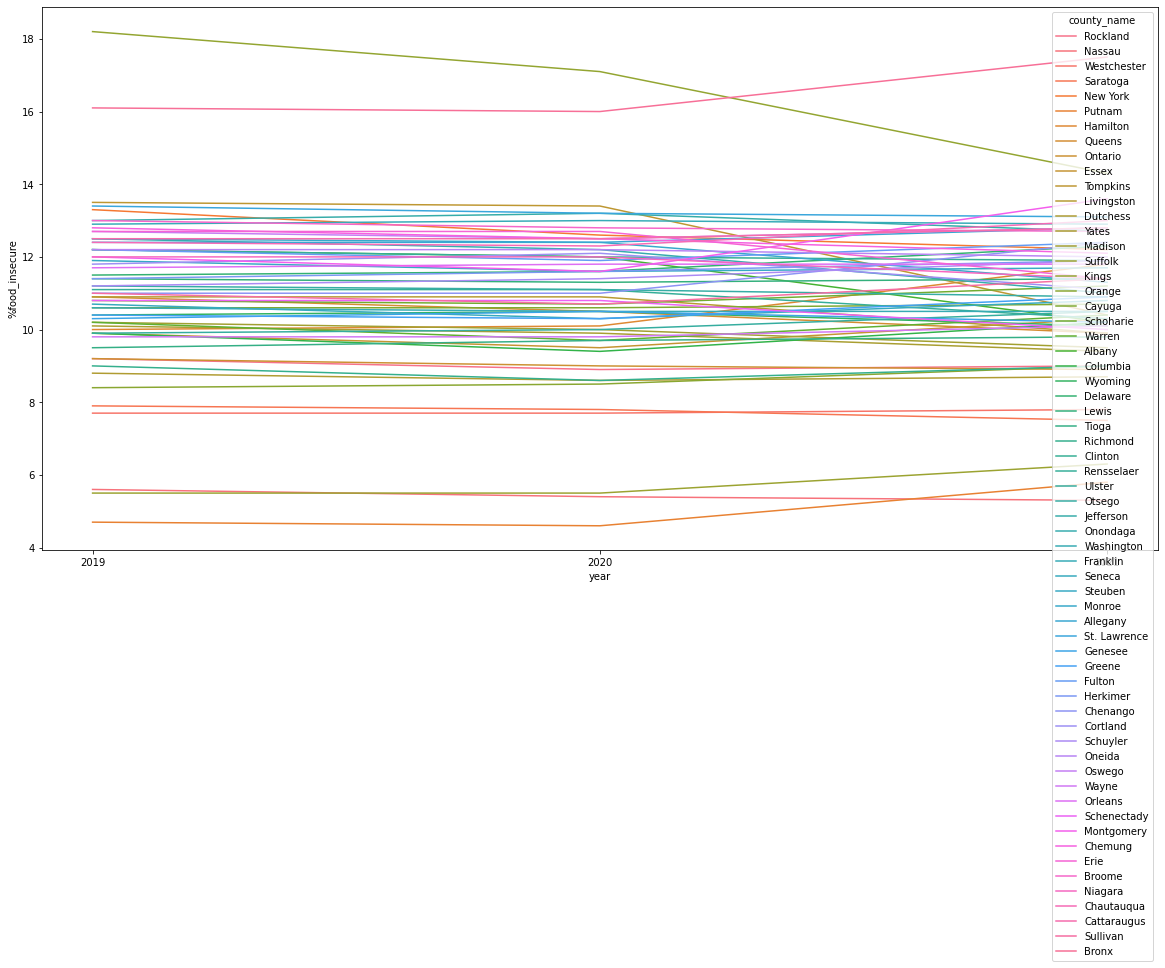

In [10]:
plt.figure(figsize = (20,10))
ax=sns.lineplot(data=dfyears,x='year',y='%food_insecure',hue='county_name')

This - quite busy - graph shows that indeed each county tells a different story, some show an increase and some a decrease while some don't change. The same pattern applies to NYC.

#### New York City

In [11]:
newyorkcity=['New York','Kings','Bronx','Richmond','Queens']
dfcity=dfyears[dfyears['county_name'].isin(newyorkcity)]

Text(0.5, 1.0, '%food insecure in new york city')

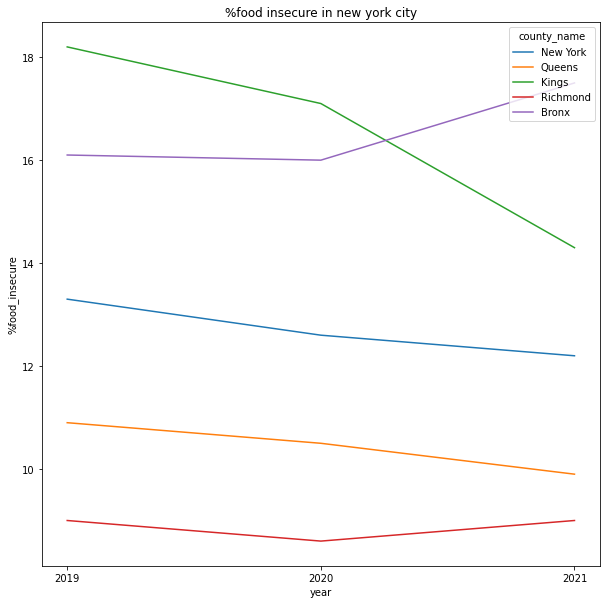

In [12]:
plt.figure(figsize = (10,10))
ax=sns.lineplot(x='year',y='%food_insecure',hue='county_name',data=dfcity)
ax.set_title("%food insecure in new york city")

 ### Is the %food insecure dependent on level of food insecurity?

#### To try and answer this question: comparing the line graphs of 2 counties with the highest levels and the 2 counties with the lowest levels 

Text(0.5, 1.0, '2 counties with highest %food_insecure')

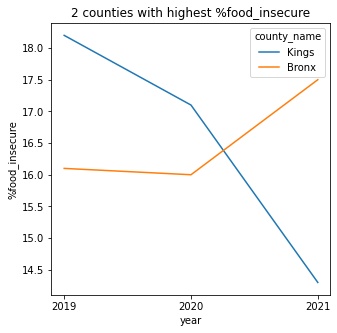

In [13]:
plt.figure(figsize = (5,5))
#filtering
#dffoodinsecure=dfyears[(dfyears['%food_insecure']>14)]
chosen=['Kings','Bronx']
dfchosen=dfyears[dfyears['county_name'].isin(chosen)]
ax=sns.lineplot(data=dfchosen,x='year',y='%food_insecure',hue='county_name')
ax.set_title("2 counties with highest %food_insecure")

Text(0.5, 1.0, '2 counties with lowest %food_insecure')

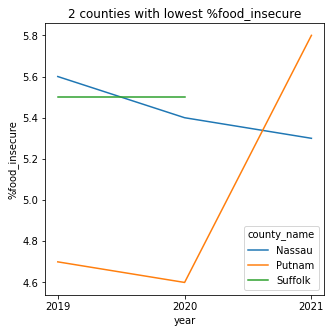

In [14]:
plt.figure(figsize = (5,5))
#filtering
dffoodsecure=dfyears[(dfyears['%food_insecure']<6)]
ax=sns.lineplot(data=dffoodsecure,x='year',y='%food_insecure',hue='county_name')
ax.set_title("2 counties with lowest %food_insecure")

Text(0.5, 1.0, '2 counties with lowest %food_insecure vs 2 counties with highest %food_insecure')

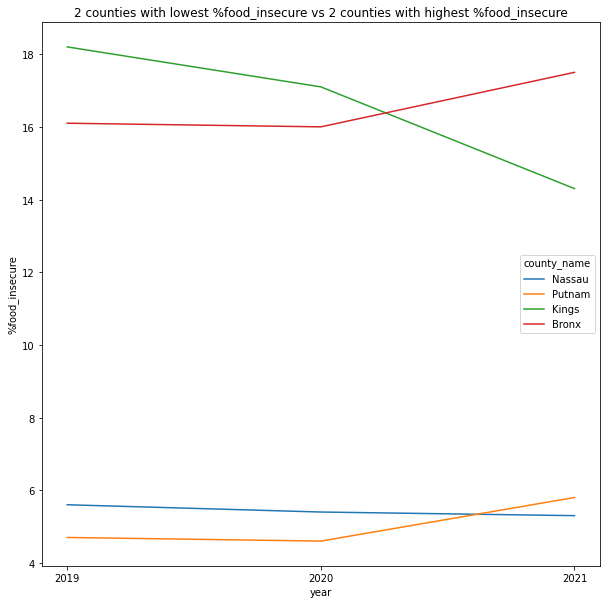

In [15]:
plt.figure(figsize = (10,10))
mix=['Kings','Bronx','Nassau','Putnam']
dfmix=dfyears[dfyears['county_name'].isin(mix)]
ax=sns.lineplot(data=dfmix,x='year',y='%food_insecure',hue='county_name')
ax.set_title("2 counties with lowest %food_insecure vs 2 counties with highest %food_insecure")

For both extremes the %food insecure does not have a set pattern and can be seen increasing or decreasing in both cases

## Some County Analysis

### An Interesting County - Kings

In [16]:
dfkings=dfyears[(dfyears['county_name']=='Richmond')]
dfkings

,index,fips,state,county_name,health_outcomes_r,health_factors_r,length_life_r,quality_life_r,yppl,%poor_fair_health,%adult_obesity,food_environment_index,graduation_cohort,graduation_rate,%some_college,life_expectancy,%diabetes,%food_insecure,%limited_access,household_income,%lunch_aid,%african_american,%american_indian,%asian,%pacific_islander,%hispanic,%white,year
27,27,36085,New York,Richmond,28,21,14,57,5606.319779,17.728901,28.0,9.1,4707.0,79.689824,68.070229,80.683519,10.7,9.0,0.172071,78466,56.091137,9.595627,0.637386,9.549533,0.106787,18.576393,60.878951,2019
104,42,36085,New York,Richmond,21,19,12,43,5567.413603,15.421366,27.5,9.1,4707.0,79.689824,68.705074,80.854809,11.0,8.6,0.172071,79719,58.963632,9.432167,0.643246,10.182095,0.112143,18.666930,60.295183,2020
166,42,36085,New York,Richmond,17,16,11,35,5541.270395,16.793000,29.2,9.0,4707.0,79.348842,69.705066,80.980922,11.2,9.0,0.172071,86624,58.452504,9.383946,0.656315,10.947341,0.112991,18.615836,59.581050,2021


<AxesSubplot:xlabel='year', ylabel='%food_insecure'>

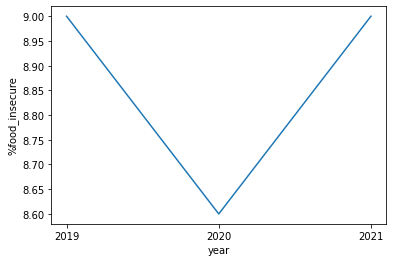

In [17]:
sns.lineplot(x='year',y='%food_insecure',data=dfkings)

### Looking at the n1 for health outcomes in 2019 & 2021 (Rockland)

In [18]:
dfyears[(dfyears['health_outcomes_r']==1)]

,index,fips,state,county_name,health_outcomes_r,health_factors_r,length_life_r,quality_life_r,yppl,%poor_fair_health,%adult_obesity,food_environment_index,graduation_cohort,graduation_rate,%some_college,life_expectancy,%diabetes,%food_insecure,%limited_access,household_income,%lunch_aid,%african_american,%american_indian,%asian,%pacific_islander,%hispanic,%white,year
0,0,36087,New York,Rockland,1,6,3,3,4272.900333,14.089078,23.7,8.8,3248.0,84.544335,63.805615,83.312875,8.8,9.2,3.337587,87873,37.106402,11.477857,0.525135,6.495311,0.135921,17.967391,62.692022,2019
91,29,36059,New York,Nassau,1,1,3,4,4292.183550,12.054412,23.6,9.7,16554.0,90.769603,75.579883,82.882055,8.6,5.4,0.468288,115301,29.672539,11.633144,0.542941,10.450453,0.099975,17.231362,59.333835,2020
167,43,36087,New York,Rockland,1,9,5,4,4362.791866,16.244030,23.1,8.7,3245.0,85.025270,63.211798,83.210665,8.6,9.0,3.337587,99831,41.050830,11.210323,0.553733,6.234710,0.137819,18.397490,62.736004,2021


Text(0.5, 1.0, 'Food Insecurity in Rockland')

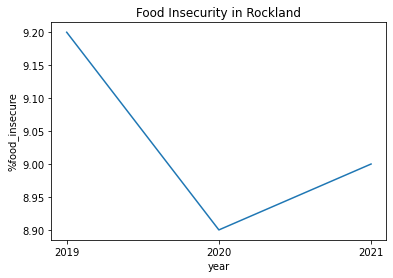

In [19]:
dfrockland=dfyears[(dfyears['fips']==36087)]
ax=sns.lineplot(data=dfrockland,x='year',y='%food_insecure')
ax.set_title("Food Insecurity in Rockland")

Text(0.5, 1.0, 'People with poor/fair health in Rockland')

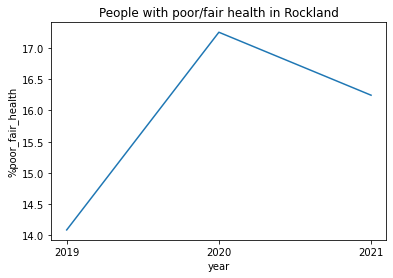

In [20]:
ax=sns.lineplot(data=dfrockland,x='year',y='%poor_fair_health')
ax.set_title("People with poor/fair health in Rockland")

Text(0.5, 1.0, '% of lunch aid received in Rockland')

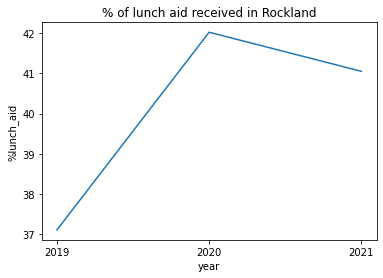

In [21]:
ax=sns.lineplot(data=dfrockland,x='year',y='%lunch_aid')
ax.set_title("% of lunch aid received in Rockland")

Text(0.5, 1.0, 'Graduation Rate in Rockland')

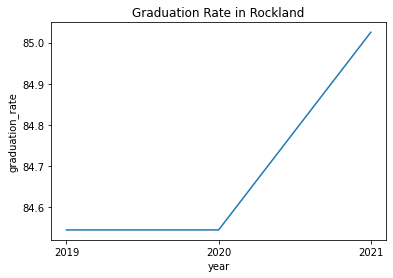

In [22]:
ax=sns.lineplot(data=dfrockland,x='year',y='graduation_rate')
ax.set_title("Graduation Rate in Rockland")

Text(0.5, 1.0, 'Household Income in Rockland')

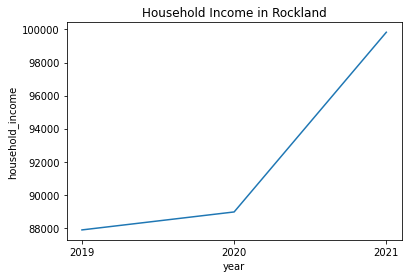

In [23]:
ax=sns.lineplot(data=dfrockland,x='year',y='household_income')
ax.set_title("Household Income in Rockland")

### Looking at the n62 for health outcomes in 2019,2020 & 2021 (The Bronx)

In [24]:
dfyears[(dfyears['health_outcomes_r']==62)]

,index,fips,state,county_name,health_outcomes_r,health_factors_r,length_life_r,quality_life_r,yppl,%poor_fair_health,%adult_obesity,food_environment_index,graduation_cohort,graduation_rate,%some_college,life_expectancy,%diabetes,%food_insecure,%limited_access,household_income,%lunch_aid,%african_american,%american_indian,%asian,%pacific_islander,%hispanic,%white,year
61,61,36005,New York,Bronx,62,62,35,62,6650.653237,26.837674,29.9,7.8,14750.0,67.511864,50.688124,80.359790,13.1,16.1,0.00092,37377,82.061762,29.349357,2.923000,4.520854,0.413347,56.158134,9.228772,2019
64,2,36005,New York,Bronx,62,62,36,62,6695.768724,26.798947,29.0,7.7,14750.0,67.511864,51.169291,80.559175,12.5,16.0,0.00092,38566,86.602547,29.222586,2.913558,4.500074,0.414766,56.365475,9.130723,2020
126,2,36005,New York,Bronx,62,62,39,62,6710.538724,29.319009,28.5,7.4,14557.0,67.169678,51.927971,80.885557,12.7,17.5,0.00092,41470,85.566274,29.240019,2.913467,4.561111,0.421307,56.379640,9.010180,2021


Text(0.5, 1.0, 'Food Insecurity in The Bronx')

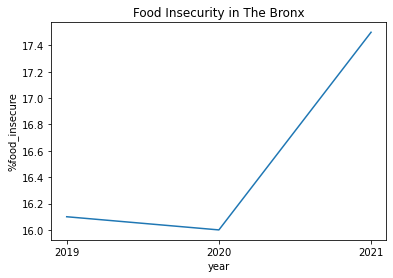

In [25]:
dfbronx=dfyears[(dfyears['fips']==36005)]
ax=sns.lineplot(data=dfbronx,x='year',y='%food_insecure')
ax.set_title('Food Insecurity in The Bronx')

Text(0.5, 1.0, 'People with poor or fair health in The Bronx')

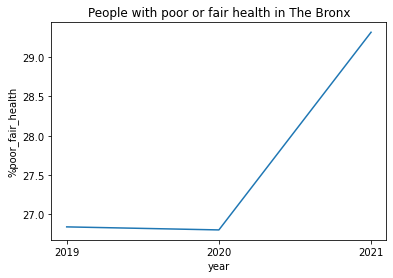

In [26]:
ax=sns.lineplot(data=dfbronx,x='year',y='%poor_fair_health')
ax.set_title('People with poor or fair health in The Bronx')

Text(0.5, 1.0, '% of lunch aid received in The Bronx')

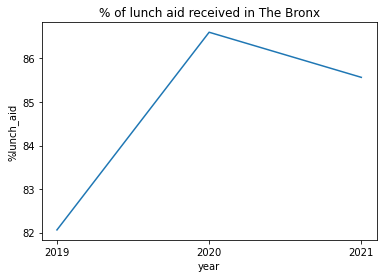

In [27]:
ax=sns.lineplot(data=dfbronx,x='year',y='%lunch_aid')
ax.set_title("% of lunch aid received in The Bronx")

Text(0.5, 1.0, 'Graduation Rate in The Bronx')

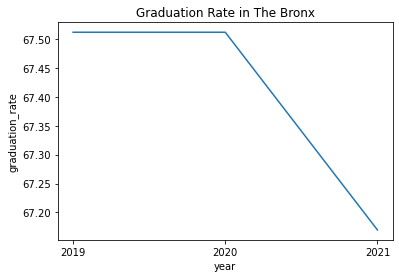

In [28]:
ax=sns.lineplot(data=dfbronx,x='year',y='graduation_rate')
ax.set_title("Graduation Rate in The Bronx")

Text(0.5, 1.0, 'Household Income in The Bronx')

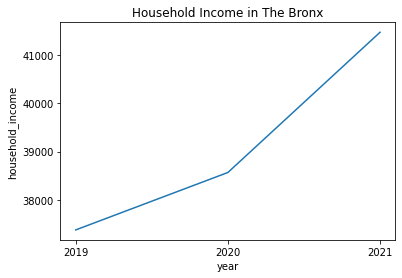

In [29]:
ax=sns.lineplot(data=dfbronx,x='year',y='household_income')
ax.set_title("Household Income in The Bronx")

In [30]:
dfyears[(dfyears['county_name']=='New York')]

,index,fips,state,county_name,health_outcomes_r,health_factors_r,length_life_r,quality_life_r,yppl,%poor_fair_health,%adult_obesity,food_environment_index,graduation_cohort,graduation_rate,%some_college,life_expectancy,%diabetes,%food_insecure,%limited_access,household_income,%lunch_aid,%african_american,%american_indian,%asian,%pacific_islander,%hispanic,%white,year
4,4,36061,New York,New York,5,12,1,30,3984.712120,14.532237,15.8,8.3,16235.0,74.536495,83.735332,84.516308,7.0,13.3,0.0,84133,64.594362,12.372359,1.183858,12.983210,0.182432,26.130531,46.677563,2019
92,30,36061,New York,New York,6,11,1,48,3925.167713,15.610280,14.6,8.3,16235.0,74.536495,84.074598,84.857972,6.5,12.6,0.0,84610,67.548735,12.456737,1.178854,12.817577,0.179345,25.850171,46.982964,2020
154,30,36061,New York,New York,6,6,1,26,3938.797817,15.566019,15.6,8.4,16410.0,74.564077,84.342424,85.270363,6.8,12.2,0.0,93007,65.611212,12.391985,1.173877,12.846210,0.181371,25.588351,47.221475,2021


<AxesSubplot:xlabel='year', ylabel='%food_insecure'>

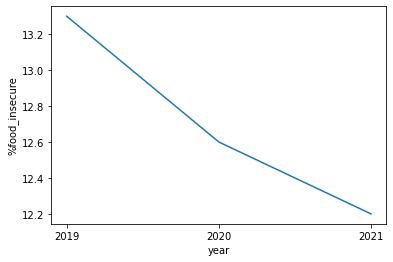

In [31]:
dfmanhattan=dfyears[(dfyears['county_name']=='New York')]
sns.lineplot(x='year',y='%food_insecure',data=dfmanhattan)

## Some Comparisons

In [32]:
chosen=['Putnam','Nassau','Bronx','Kings']
dfsmall=dfyears[dfyears.county_name.isin(chosen)]

Text(0.5, 1.0, 'Food Insecurity Over 3 years')

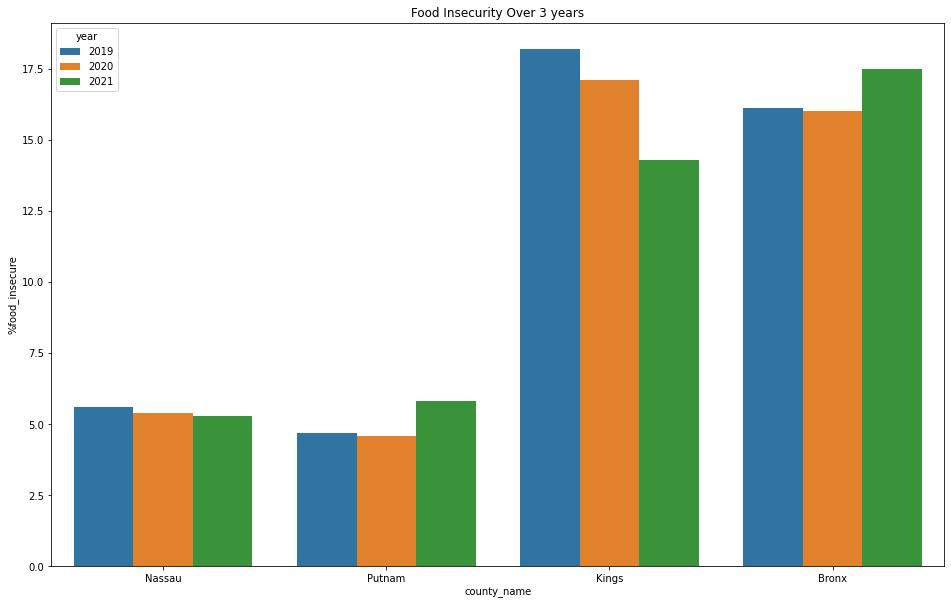

In [33]:
plt.figure(figsize = (16,10))
ax=sns.barplot(data=dfsmall,x='county_name',y='%food_insecure',hue='year')
ax.set_title("Food Insecurity Over 3 years")

## Increase vs Decrease

In [34]:
conditions = [
    df2019['%food_insecure'] < df2021['%food_insecure'],
    df2019['%food_insecure'] > df2021['%food_insecure'],
    df2019['%food_insecure']== df2021['%food_insecure']  
]

choices = ['increase','decrease','constant']

df2021['change'] = np.select(conditions, choices, default=0)

In [35]:
df2021['change'].value_counts()

decrease    32
increase    27
constant     3
Name: change, dtype: int64

Text(0.5, 1.0, 'Change in food insecurity levels from 2019 to 2021')

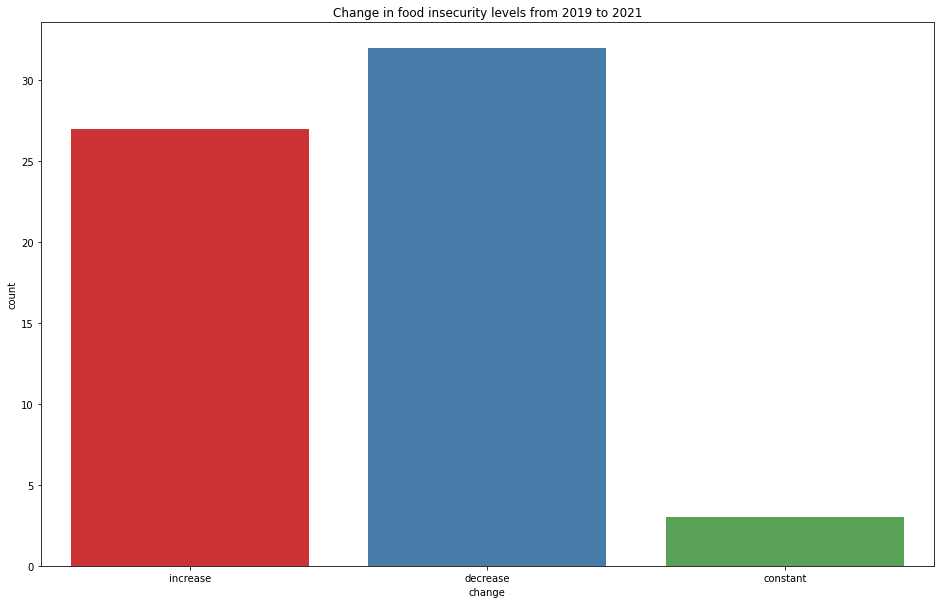

In [36]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x="change", data=df2021,palette="Set1")
ax.set_title("Change in food insecurity levels from 2019 to 2021")

So even though some counties' level of people that are food insecure increased while some decreased the percentage of counties that increased is a high 44%. While NY State as a whole might not have suffered the same effects, COVID-19 did have some negative effects in many places.